In [2]:
import re
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Ecommerce Sentiment Analysis/Dataset/Product Review Daraz.xlsx')

In [ ]:
file_path='/content/drive/MyDrive/Ecommerce Sentiment Analysis/Dataset/Daraz.xlsx'

In [ ]:
df.head()

In [ ]:
df=df.drop(["Comments","Class"],axis=1)

In [ ]:
df.head()

In [ ]:
df.columns=["Sentence","sentiment"]

In [ ]:
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax = ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [ ]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.sentiment =='Negative']),
      "\nTotal Positive :",len(df[df.sentiment=='Positive']))

In [ ]:
sns.set(font_scale=1.4)
df['sentiment'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of data", labelpad=12)
plt.ylabel("Detected Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
df.shape

In [ ]:
# df.drop_duplicates(inplace=True)

In [ ]:
df.shape

**Lower Case**

In [ ]:
df["Lower_Case"] = df["Sentence"].str.lower()
df.head()

**Stopwords Removal**

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['Stopwords']=df['Lower_Case'].apply(process_text)

In [ ]:
df.head()

In [ ]:
df=df.drop(["Sentence","Lower_Case"],axis=1)

**Remove Small Text**

In [ ]:
df['length'] = df['Stopwords'].apply(lambda x:len(x.split()))

dataset = df.loc[df.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

dataset['no_char'] = df['Stopwords'].apply(lambda cleaned: len(cleaned))

**Stemming**

In [ ]:
# !pip install bangla-stemmer
# from bangla_stemmer.stemmer import stemmer
# ## stemmer function
# def stem_text (x):
#   stmr = stemmer.BanglaStemmer()
#   words=x.split(' ')
#   stm = stmr.stem(words)
#   words=(' ').join(stm)
#   return words
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [ ]:
df['Cleantext']=df['Stopwords'].apply(stemming)

In [ ]:
df.head()

In [ ]:
df=df.drop(["Stopwords","length"],axis=1)

In [ ]:
df.head()

In [ ]:
def data_summary(df):
    reviews = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(df.Cleantext) for word in t.strip().split()]
    class_label= [k for k,v in df.sentiment.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(df[df.sentiment==label].Cleantext) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        reviews.append(len(list(df[df.sentiment==label].Cleantext)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
        print("\nClass Name : ",label)
        print("Number of Comments:{}".format(len(list(df[df.sentiment==label].Cleantext))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return reviews,words,u_words,class_label

#call the fucntion
reviews,words,u_words,class_names = data_summary(df)

In [ ]:
data_matrix = pd.DataFrame({'Total comments':reviews,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
data = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

data

In [ ]:
df.head()

# **Label Encoding**

In [ ]:
# def label_encoding(df,bool):
#   le = LabelEncoder()
#   le.fit(df.sentiment)
#   encoded_labels = le.transform(df.sentiment)
#   labels = np.array(encoded_labels) # Converting into numpy array
#   class_names =le.classes_ ## Define the class names again
#   if bool == True:
#     print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
#   return labels  

# def dataset_split(news,Label):
#   '''
#   This function will split the dataset into Train-Test-Validation set
#   '''

#   X,X_test,y,y_test = train_test_split(news,Label,train_size = 0.8,
#                                                   test_size = 0.2,random_state =0)
#   X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
#                                                   test_size = 0.2,random_state =0)
#   print(color.BOLD+"Feature Size :======>"+color.END,X_train.shape[1])
#   print(color.BOLD+"\nDataset Distribution:\n"+color.END)
#   print("\tSet Name","\t\tSize")
#   print("\t========\t\t======")

#   print("\tFull\t\t\t",news.shape[0],
#         "\n\tTraining\t\t",X_train.shape[0],
#         "\n\tTest\t\t\t",X_test.shape[0],
#         "\n\tValidation\t\t",X_valid.shape[0])
  
#   return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
df.head()

In [ ]:
!pip install Keras-Preprocessing

In [ ]:
import keras
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences as pad
from sklearn.preprocessing import LabelEncoder

In [ ]:
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
def label_encoding(df,bool):
  le = LabelEncoder()
  le.fit(df.sentiment)
  encoded_labels = le.transform(df.sentiment)
  labels = np.array(encoded_labels)
  class_names =le.classes_ 
  if bool == True:
    print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
  return labels  
def dataset_split(news,Label):
  '''
  This function will split the dataset into Train-Test-Validation set
  '''

  X,X_test,y,y_test = train_test_split(news,Label,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  print(color.BOLD+"Feature Size :======>"+color.END,X_train.shape[1])
  print(color.BOLD+"\nDataset Distribution:\n"+color.END)
  print("\tSet Name","\t\tSize")
  print("\t========\t\t======")

  print("\tFull\t\t\t",news.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0],
        "\n\tValidation\t\t",X_valid.shape[0])
  
  return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
def encoded_texts(dataset,padding_length,max_words):

  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='', document_count=0)
  tokenizer.fit_on_texts(df.Cleantext)
  #============================== Tokenizer Info =================================
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  #=============================== Print all the information =========================
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)   
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )    
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(df.Cleantext)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))  
  print(df.Cleantext[10],"\n",sequences[10]) 

  #==================================== Pad Sequences ============================== 
  corpus = pad(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  print("\n\t\t\t====== Paded Sequences ======\n",df.Cleantext[10],"\n",corpus[10])   

  #=================================     Label Encoding ================================
  labels = label_encoding(df,True)

   # save the tokenizer into a pickle file
  with open(file_path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return corpus,labels
  
#call the function
num_words = 5000
corpus,labels = encoded_texts(df,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)

In [ ]:
#Call Dataset Split Function
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(corpus,labels)

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [ ]:
embedding_dimension = 128
input_length = 300
vocab_size = 5000
num_classes = 12
batch_size = 64
num_epochs = 150

accuracy_threshold = 0.97
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_dimension, input_length = input_length),
tf.keras.layers.Conv1D(128, 5, activation= 'relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.LSTM(64, return_sequences=True,dropout = 0.2),
tf.keras.layers.LSTM(64, return_sequences=True,dropout = 0.2),
tf.keras.layers.Dense(28, activation='relu'),
tf.keras.layers.Dense(14, activation='relu'),
keras.layers.Flatten(),
tf.keras.layers.Dense(num_classes , activation='softmax')])
model.summary()
model.compile(optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
    y_train,
    epochs=num_epochs,
    batch_size = batch_size,
    validation_data=(X_valid, y_valid),
    verbose =1)
    #callbacks = callback_list)

In [ ]:
score = training_model.evaluate(X_test, y_test,batch_size=1024, verbose=2)
print('Test loss:', score[0])
acc=score[1]
print('Test accuracy:', acc)


In [ ]:
score = training_model.evaluate(X_train, y_train,batch_size=1024, verbose=2)
print('Train loss:', score[0])
acc=score[1]
print('Train accuracy:', acc)


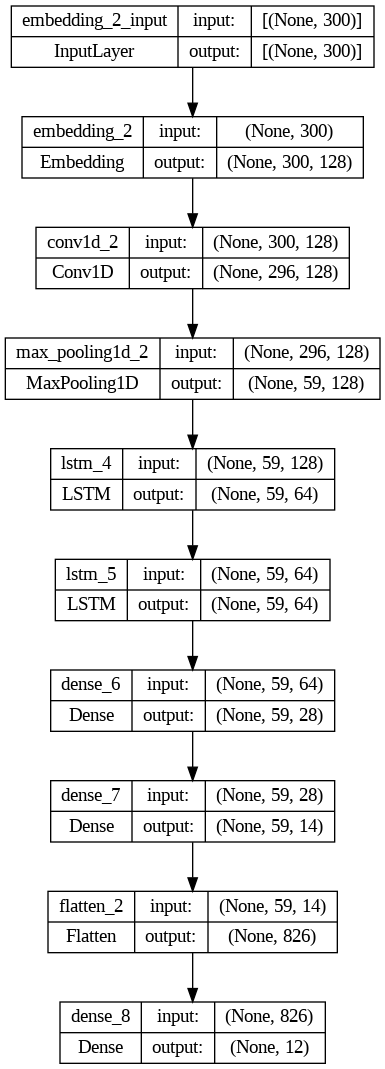

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# **Model Visualization**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-ujrsshr6
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-ujrsshr6
  Resolved https://github.com/paulgavrikov/visualkeras to commit d7111d3471173c0b16853a6ce5e4cc645498380a
  Preparing metadata (setup.py) ... done


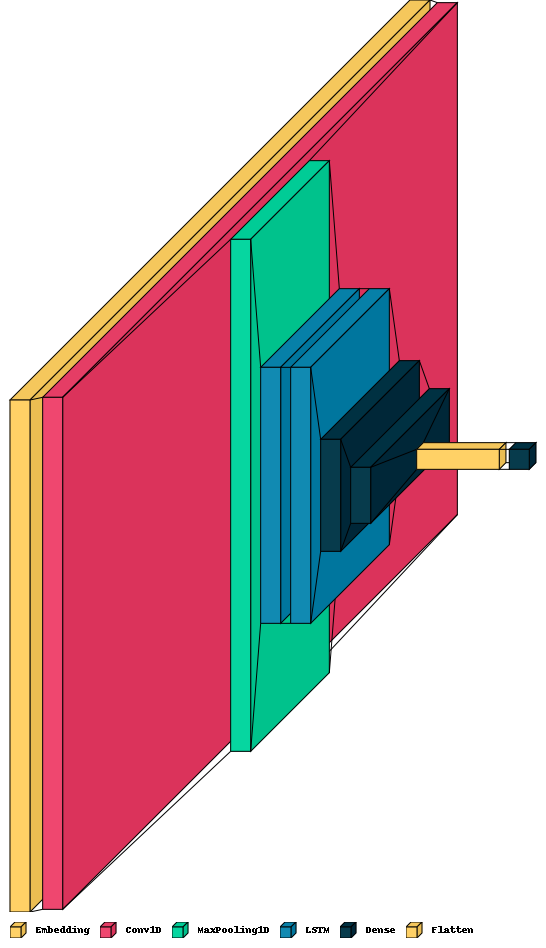

In [ ]:
from tensorflow.keras.models import Model
!pip install git+https://github.com/paulgavrikov/visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True) 

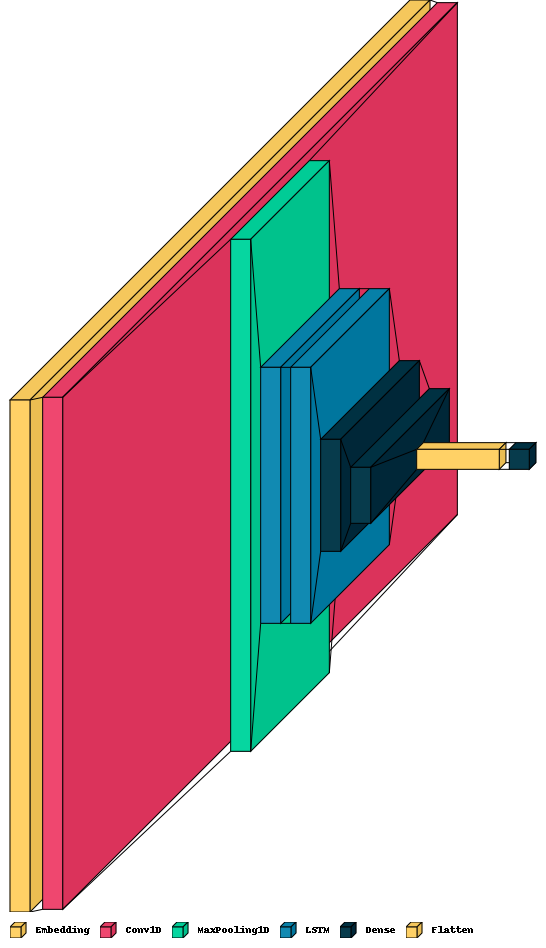

In [ ]:
visualkeras.layered_view(model, legend=True) 

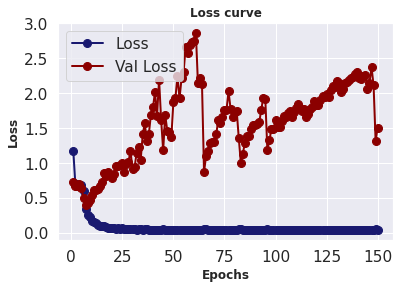

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
sns.set_style('darkgrid')


plt.plot(epochs, loss_values, color='midnightblue', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_loss_values, color='darkred', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Loss curve',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Loss',fontsize=12,fontweight='bold')
plt.legend(['Loss','Val Loss'])
                  

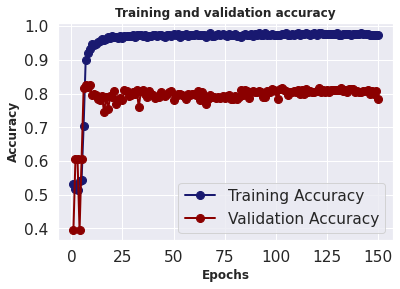

In [ ]:
plt.plot(epochs, acc, color='midnightblue', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.legend(['Training Accuracy','Validation Accuracy'])

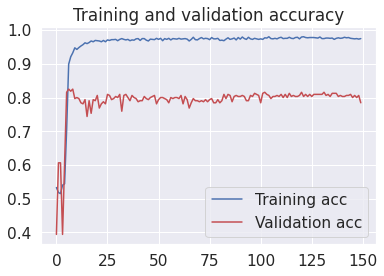

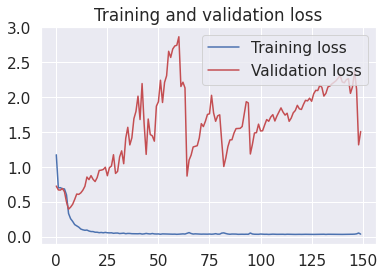

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
class_names = ['Positive','Negative']
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
report = report.rename(index={'0': 'Positive','1':'Negative',})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

13/13 [==============================] - 2s 95ms/step


,precision,recall,f1-score,support
Positive,71.84,77.49,74.56,191.000000
Negative,77.72,72.12,74.81,208.000000
accuracy,74.69,74.69,74.69,0.746867
macro avg,74.78,74.80,74.69,399.000000
weighted avg,74.91,74.69,74.69,399.000000


13/13 [==============================] - 1s 51ms/step


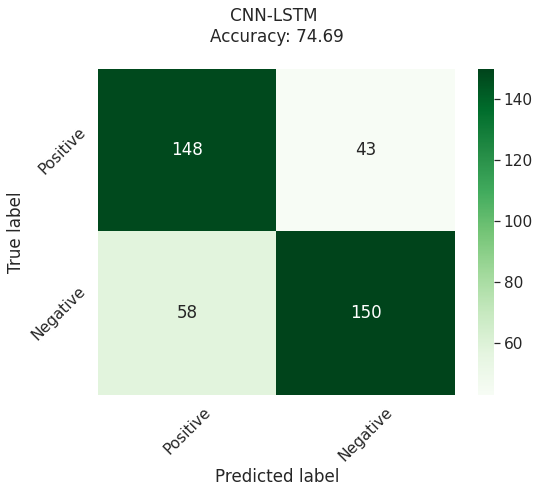

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred) 

class_names = ['Positive','Negative']
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = class_names, 
                     columns = class_names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens", fmt='g')
plt.title('CNN-LSTM \nAccuracy: {0:.2f}\n'.format(accuracy_score(y_test, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
sample_comment = "very bad product"
cleaned_comment = process_text(sample_comment)

class_names = ['Negative','Positive']
with open(file_path+'tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
seq= loaded_tokenizer.texts_to_sequences([cleaned_comment])
padded = pad(seq, value=0.0,padding='post', maxlen= 300 )
pred = model.predict(padded)
#print(pred) 
class_names[np.argmax(pred)]   

1/1 [==============================] - 0s 37ms/step


'Negative'